# Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("/kaggle/input/e-commerce-dataset/ecommerce_dataset_updated.csv")

In [3]:
df.sample(10)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
2198,58ced1cb,13c71160-0,Beauty,203.25,30,142.27,Cash on Delivery,29-01-2024
1569,2cac4c48,d36761e5-d,Home & Kitchen,189.90,15,161.41,Credit Card,13-01-2024
1219,925202a4,52599214-3,Sports,123.91,25,92.93,Credit Card,10-11-2024
2010,95f62610,03504d8a-d,Home & Kitchen,149.82,15,127.35,Cash on Delivery,18-10-2024
3034,ac876e50,6d6f9b42-8,Sports,75.21,15,63.93,Credit Card,28-07-2024
2187,8d99e314,9f6995da-c,Electronics,249.98,5,237.48,Cash on Delivery,28-02-2024
36,ca363a04,7f05dd28-6,Toys,24.17,25,18.13,Credit Card,15-01-2024
2616,8297a01f,3d2f62bd-b,Home & Kitchen,226.61,0,226.61,Net Banking,28-06-2024
1722,4e5efb67,f48ee0b6-4,Books,98.06,0,98.06,Debit Card,29-07-2024
2206,e95af48a,bb0b56a8-0,Electronics,398.89,50,199.44,Cash on Delivery,21-01-2024


In [4]:
# Convert Purchase_Date to datetime format
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')


# Statistical Analysis

In [5]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       Price (Rs.)  Discount (%)  Final_Price(Rs.)  \
count  3660.000000   3660.000000       3660.000000   
mean    254.800675     18.825137        206.906579   
min      10.090000      0.000000          5.890000   
25%     134.012500      5.000000        104.512500   
50%     253.845000     15.000000        199.185000   
75%     377.595000     25.000000        304.117500   
max     499.960000     50.000000        496.820000   
std     141.682621     14.731338        122.687844   

                       Purchase_Date  
count                           3660  
mean   2024-06-13 00:46:01.967213056  
min              2024-01-01 00:00:00  
25%              2024-03-24 00:00:00  
50%              2024-06-11 12:00:00  
75%              2024-09-03 00:00:00  
max              2024-11-21 00:00:00  
std                              NaN  


In [6]:
# Check for non-numeric columns
print("\nNon-numeric columns:")
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

# Calculate the correlation matrix using only numeric columns
correlation_matrix = df.corr(numeric_only=True) # This will ignore non-numeric columns
print("\nCorrelation Matrix:")
print(correlation_matrix)



Non-numeric columns:
['User_ID', 'Product_ID', 'Category', 'Payment_Method', 'Purchase_Date']

Correlation Matrix:
                  Price (Rs.)  Discount (%)  Final_Price(Rs.)
Price (Rs.)          1.000000     -0.003473          0.935691
Discount (%)        -0.003473      1.000000         -0.311515
Final_Price(Rs.)     0.935691     -0.311515          1.000000


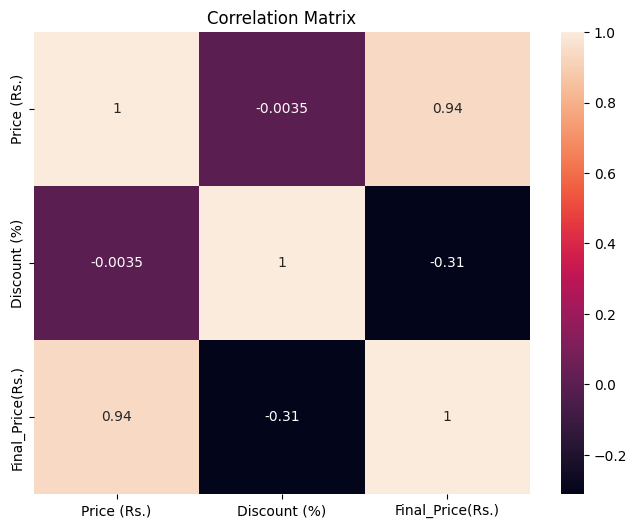

In [7]:
# Visualize correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Exploratory Data Analysis (EDA)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


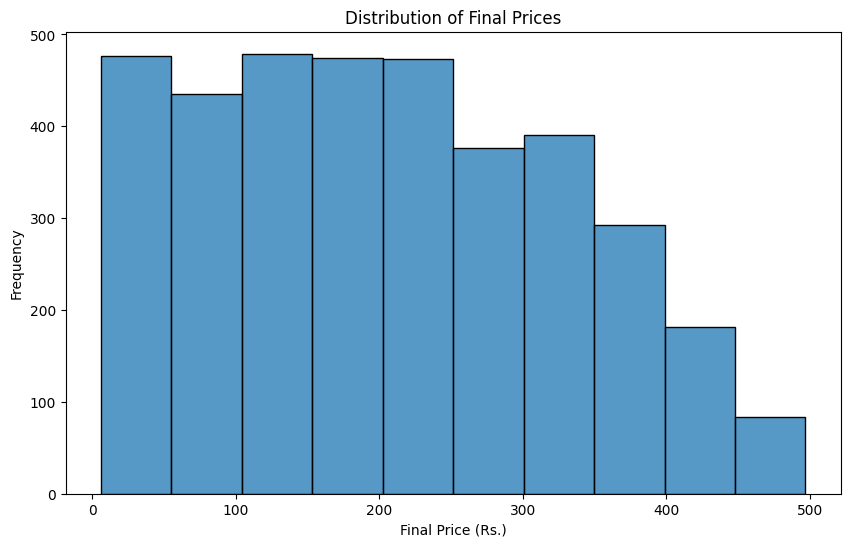

In [8]:
# Distribution of Final Prices
plt.figure(figsize=(10,6))
sns.histplot(df['Final_Price(Rs.)'], bins=10)
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price (Rs.)')
plt.ylabel('Frequency')
plt.show()

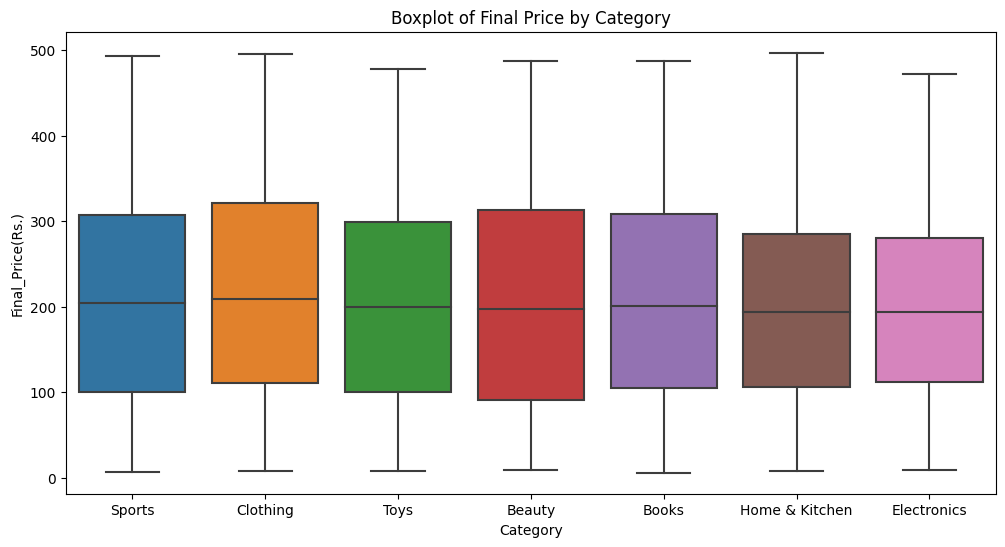

In [9]:
# Boxplot for Price by Category
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Final_Price(Rs.)', data=df)
plt.title('Boxplot of Final Price by Category')
plt.show()

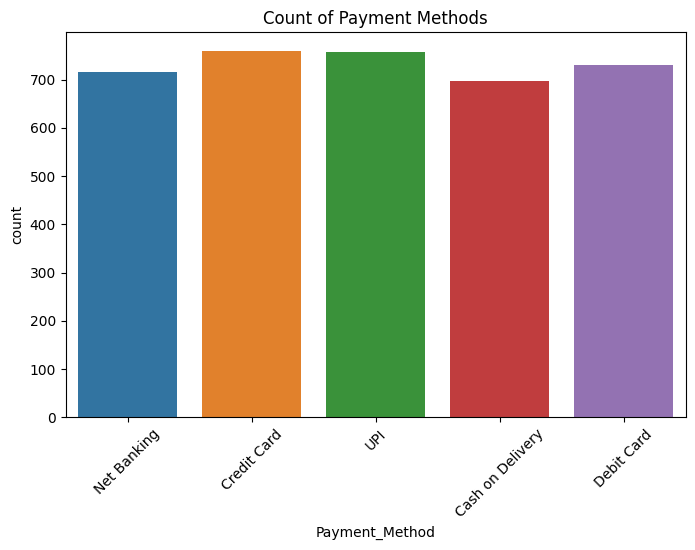

In [10]:
# Count of Payment Methods
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Payment_Method')
plt.title('Count of Payment Methods')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [11]:
# Create a new feature: Price after Discount
df['Discounted_Amount(Rs.)'] = df['Price (Rs.)'] * (df['Discount (%)'] / 100)
df['Price_After_Discount(Rs.)'] = df['Price (Rs.)'] - df['Discounted_Amount(Rs.)']

# Create a feature for the month of purchase
df['Purchase_Month'] = df['Purchase_Date'].dt.month

# Display the updated DataFrame with new features
print("\nUpdated DataFrame with New Features:")
print(df.head())


Updated DataFrame with New Features:
    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  Discounted_Amount(Rs.)  \
0             31.05    Net Banking    2024-11-12                  5.4795   
1            186.23    Net Banking    2024-02-09                 46.5580   
2            237.76    Credit Card    2024-09-01                 79.2550   
3            129.89            UPI    2024-04-01                 43.2975   
4            195.84    Net Banking    2024-09-27                 48.9600   

   Price_After_Discount(Rs.)  Purchase_Month  
0                    31.0505              11  
1                   186.23

# Encoding using LabelEncoder

In [12]:
# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Category', 'Payment_Method']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Spliting data

In [13]:
# Features and target variable
X = df[['Price (Rs.)', 'Discount (%)', 'Category', 'Payment_Method']]
y = df['Final_Price(Rs.)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear model use its regression task

In [14]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# model evaluation 

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)


Model Evaluation:
Mean Squared Error: 511.50
R^2 Score: 0.96

Model Coefficients:
                Coefficient
Price (Rs.)        0.815543
Discount (%)      -2.569524
Category           0.257321
Payment_Method    -0.054224


# Improve Accuracy Using Random Forest
  using feature engineering 

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}, R^2 Score: {r2_rf:.2f}")

Random Forest MSE: 0.79, R^2 Score: 1.00


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model MSE: {mse_best:.2f}, R^2 Score: {r2_best:.2f}")

Best Model MSE: 0.76, R^2 Score: 1.00


In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.96847901 0.97036659 0.96788955 0.97193011 0.9730805 ]
Mean CV Score: 0.97


# Write A Suggestion In Comment